In [1]:
import numpy as np
import sympy
from sympy import I, latex, expand_complex, root, exp, Abs, arg, re, im
from IPython.display import display, Latex
import matplotlib.pyplot as plt

from google.colab import files
import pandas as pd

# Занятие 9
# Алгебра
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [ ]:
z1 = 5 * 3 ** sympy.S.Half + 5 * I
z2 = -3 + 3 * I
z3 = -1 + I
z4 = I
z5 = sympy.S(12) / 13 + sympy.S(5) / 13 * I

anses = [z1 * z2, (z2 - 5 *z3) ** 6, (z4 / z3) ** sympy.S.Half, (z1 ** 2 + z3) / (13 * z5 - 2 * z2)]
for ans in anses:
    display(sympy.expand_complex(ans))

-15*sqrt(3) - 15 + I*(-15 + 15*sqrt(3))

512*I

2**(3/4)*sqrt(sqrt(2)/4 + 1/2)/2 - 2**(3/4)*I*sqrt(1/2 - sqrt(2)/4)/2

-2*sqrt(3)/13 + 881/325 + I*(67/325 + 36*sqrt(3)/13)

### Задание  2.
Вычисления Примера 1 проделать для мнимой единицы из Python (использовать встроенную функцию complex).

In [ ]:
from math import sqrt

z1 = complex(5 * sqrt(3), 5)
z2 = complex(-3, 3)
z3 = complex(-1, 1)
z4 = complex(0, 1)
z5 = complex(12 / 13, 5 / 13)

print(z1 * z2, (z2 - 5 *z3) ** 6, (z4 / z3) ** 0.5, (z1 ** 2 + z3) / (13 * z5 - 2 * z2))

(-40.98076211353316+10.980762113533157j) (-0+512j) (0.7768869870150187-0.32179712645279135j) (2.4442998757586336+5.002602236344583j)


### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $A_k$, где $k$  - номер корня.

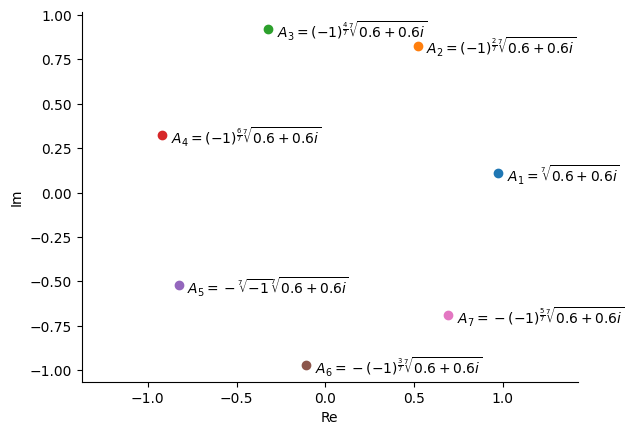

In [ ]:
z = 3 / 5 + 3 / 5 * I

roots = [sympy.root(z, 7, k) for k in range(7)]


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.axis('equal')
ax.set(xlabel="Re", ylabel="Im")


for x, y, k_complex_z in zip(map(sympy.re, roots),
                              map(sympy.im, roots),
                              enumerate(roots)):
    ax.scatter(x, y)
    k, complex_z = k_complex_z
    ax.annotate(f'$A_{k + 1} = {sympy.latex(complex_z)}$',
            xy=(x, y),
            xytext=(x + 0.05, y - 0.05))


### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

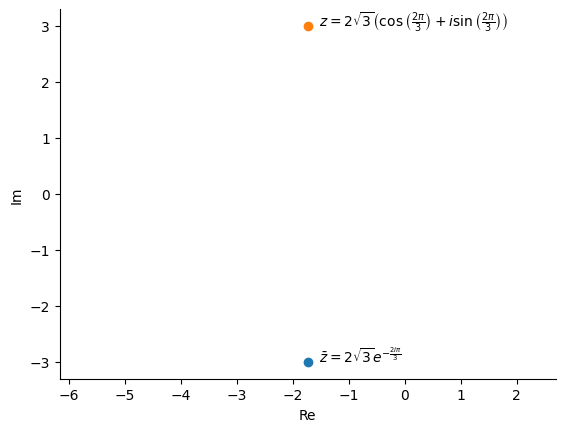

In [ ]:
z = -(3) ** sympy.S.Half + 3 * I
z_conjugate = sympy.conjugate(z)

z_conjugate_exp = sympy.functions.Abs(z_conjugate) * sympy.exp(I * sympy.functions.arg(z_conjugate))
z_trig = sympy.functions.Abs(z) * (sympy.cos(sympy.functions.arg(z), evaluate=False) + sympy.sin(sympy.functions.arg(z), evaluate=False) * I)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.axis('equal')
ax.set(xlabel="Re", ylabel="Im")

zz = [z_conjugate_exp, z_trig]
flag = True
for x, y, name in zip(map(sympy.re, zz), map(sympy.im, zz), zz):
    ax.scatter(x, y)
    if flag:
        ax.annotate(r'$\bar{z} = ' + latex(name) + r'$', xy=(x, y), xytext=(x + 0.2, y))
        flag = False
    else:
        ax.annotate(r'$z = ' + latex(name) + r'$', xy=(x, y), xytext=(x + 0.2, y))

#### Задание  5*.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел.

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + \sin(\varphi))$ использовать формулу
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$,
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n$.

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность в формате float модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и преобразовывать результат в формат float).

In [12]:
from sympy import sin, cos, Pow, pi

z = 5 * (cos(pi / 8) + sin(pi / 8) * I)

roots_4 = []
for k in range(4):
    root_k = Pow(5, 1/4) * (cos((pi / 8 + 2 * pi * k) / 4) + sin((pi / 8 + 2 * pi * k) / 4) * I)
    roots_4.append(root_k)

for i in range(len(roots_4)):
    display(Latex(fr'${latex(roots_4[i])}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Задание  6*.
Считать из файла "complex_numbers.xlsx" комплексные числа (откройте файл, обратите внимание на подписи строк и столбцов, имя листа).
Вывести на экран  считанные числа в алгебраической  форме, их модули и аргументы. Дописать в файл листы "abs" и "arg" с названиями строк в виде алгебраической формы комплексного числа (например, $2-3i$) и столбцом "abs" и "arg" соответсвенно со значениями модулей и аргументов чисел, округленными до 2 знаков после запятой. Округлять можно, например, с помощью round из Python.

**Указание:** построить по считанным из файла значениям вещественной и мнимой части комплексные числа sympy, вычислить приближенно их модули и аргументы средствами sympy, затем округлить.

In [ ]:
with pd.ExcelWriter("/Users/almiravhadiev/Downloads/ВШЭ/MathPracs/Algebra/Занятие_9/Авхадиев_Альмир_complex_numbers.xlsx", mode='a') as file:
    data_df = pd.read_excel(file)
    data = data_df.to_numpy()

    nums = [data[i][1] + data[i][2] * I for i in range(len(data))]

    args = [[nums[i], arg(nums[i])] for i in range(len(nums))]
    abss = [[nums[i], round(Abs(nums[i]), 2)] for i in range(len(nums))]

    args_df = pd.DataFrame(args)
    args_df.to_excel(file, sheet_name='arg', header=False, index=False)

    abss_df = pd.DataFrame(abss)
    abss_df.to_excel(file, sheet_name='abs', header=False, index=False)

### Индивидуальное задание.
Составить уравнение 3 степени с переменной $z$, корнями которого являются числа $z_1$, $z_2$ и $z_3$, вывести уравнение на экран (скобки должны быть раскрыты!).

Решить полученное уравнение с использованием sympy.roots.
Корни уравнения вывести на экран в алгебраической форме.

Преобразовать **полученные** корни уравнения в комплексные числа Python (не sympy!), вывести на экран комплексно-сопряженные к ним числа.

Затем вывести на экран на отдельной строчке модули всех чисел и на отдельной строчке аргументы, все числа округлить до 3 знаков после запятой, т.е. не более 3 знаков после запятой.


Вариант 175

$$z_1 = 5 i,\ z_2 = 6 + 6 i,\ z_3 = 2 - 9 i$$




In [14]:
from sympy.abc import z

z1 = 5 * I
z2 = 6 + 6 * I
z3 = 2 - 9 * I

eq = (z - z1) * (z - z2) * (z - z3)
roots = [item for i, item in enumerate(sympy.roots(eq))]


display(*[Latex(f'$r_{i + 1} = {latex(roots[i])}$') for i in range(len(roots))])

print('\n')

display(*[Latex(r'$\bar{r_{' + latex(i + 1) + r'}} = ' + \
                latex(complex(re(item), im(item)).conjugate()) + r'$') for i, item in enumerate(roots)])

print('\n')

display(*[Latex(f'$|r_{i + 1}|\ = {latex(round(Abs(item), 3))}$') for i, item in\
          enumerate(roots)])

print('\n')

display(*[Latex(fr'$arg(r_{i + 1}) \ = {latex(arg(item))}$') for i, item in\
          enumerate(roots)])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>